# Tidal Report

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import os

In [15]:
data = pd.read_csv("ASTR19_F25_Group_Project_data.txt",
                   comment="#",
                   sep=r"\s+",
                   header=None,
                   names=["day", "time", "height"])
data.head()

,day,time,height
0,1,8:07,6.57
1,1,15:37,-0.39
2,2,8:55,5.38
3,2,16:25,-1.74
4,3,9:45,5.26


In [16]:
hour_min = data["time"].str.split(":", expand=True).astype(int)

data["hours"] = data["day"] * 24 + hour_min[0] + hour_min[1] / 60

data.head()

,day,time,height,hours
0,1,8:07,6.57,32.116667
1,1,15:37,-0.39,39.616667
2,2,8:55,5.38,56.916667
3,2,16:25,-1.74,64.416667
4,3,9:45,5.26,81.750000


In [17]:
#A (average height, strength of tide) 
#phi (timing offsets)
def tide_model (x, A0, A1, phi1, A2, phi2):
    w1 = 2*np.pi/12.42
    w2 = 2*np.pi/24.84
    return A0 + A1*np.sin(w1*x + phi1) + A2*np.sin(w2*x + phi2)
tide_model(0,0,0,0,0,0)

np.float64(0.0)

In [18]:
x = data["hours"]
y = data["height"]

fit_values, fit_error = curve_fit(tide_model,x, y,)

fit_values

array([ 2.41004669, -2.16115178,  0.69398193,  0.25403693,  0.79004343])

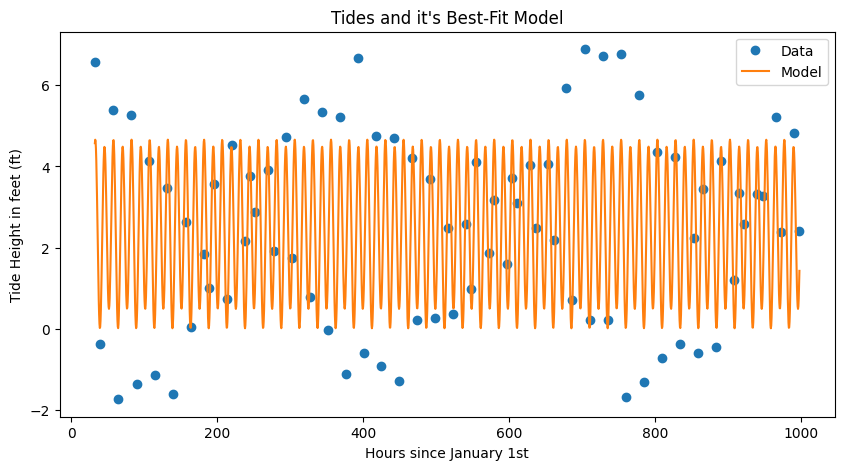

In [19]:
x_fit = np.linspace(min(x), max(x), 2000)
y_fit = tide_model(x_fit, *fit_values) #instead plot return of y model and x data

plt.figure(figsize=(10,5))
plt.plot(x, y, 'o', label="Data")
plt.plot(x_fit, y_fit, label="Model")
plt.xlabel("Hours since January 1st")
plt.ylabel("Tide Height in feet (ft)")
plt.title("Tides and it's Best-Fit Model")
plt.legend()
plt.savefig("model_plot.pdf")
plt.show()

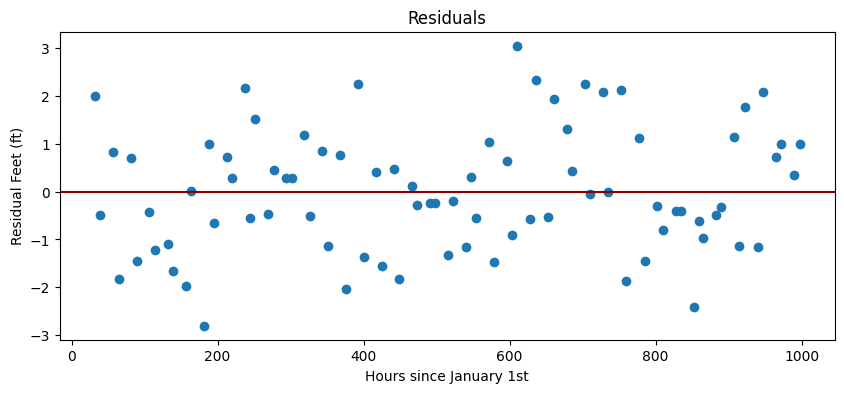

In [20]:
residuals = y - tide_model(x, *fit_values)

plt.figure(figsize=(10,4))
plt.plot(x, residuals, 'o')
plt.axhline(0, color='darkred')
plt.xlabel("Hours since January 1st")
plt.ylabel("Residual Feet (ft)")
plt.title("Residuals")
plt.savefig("residuals.pdf")
plt.show()

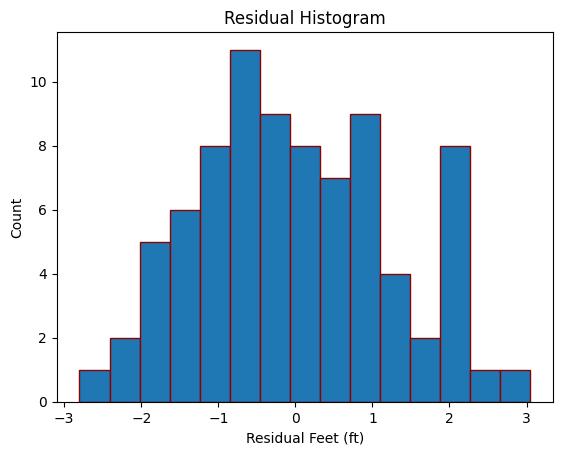

In [25]:
plt.figure()
plt.hist(residuals, bins=15, edgecolor='darkred')
plt.xlabel("Residual Feet (ft)")
plt.ylabel("Count")
plt.title("Residual Histogram")
plt.savefig("residual_hist.pdf")
plt.show()

std_residuals = np.std(residuals)
std_residuals

sigma = 0.25

In [26]:
total_variance = std_residuals**2

measurement_variance = sigma**2

intrinsic_variance = max(0, total_variance - measurement_variance)

sigma_intrinsic = np.sqrt(intrinsic_variance)

sigma_intrinsic

np.float64(1.2432285363637996)

In [23]:
z_score = 2.0 / std_residuals
z_score

np.float64(1.5771432733677353)

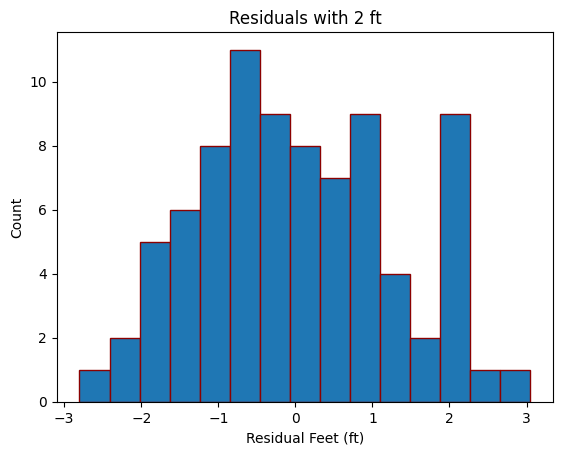

In [24]:
residuals_with_tsunami = np.append(residuals, 2.0)

plt.figure()
plt.hist(residuals_with_tsunami, bins=15, edgecolor='darkred')
plt.xlabel("Residual Feet (ft)")
plt.ylabel("Count")
plt.title("Residuals with 2 ft")
plt.savefig("hist_withtsunami.pdf")
plt.show()